# Contents
01. Import Libraries
02. Import Datasets
03. Lesson
04. Part 2 Exercise

# 01. Import Libraries

In [22]:
!pip install seaborn matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [23]:
import pandas as pd
import numpy as np

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from matplotlib.ticker import FuncFormatter

# 02. Import Datasets

In [27]:
# Defines path as intro file path for Instacart project

path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Instacart Basket Analysis'

In [158]:
# Imports latest customer_orders_products dataframe

ic_final = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ic_final.pkl'))

# 03. Lesson

## Create a Bar Chart

<Axes: xlabel='orders_day_of_week'>

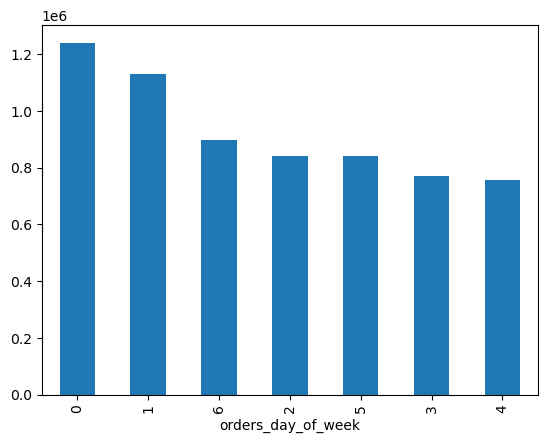

In [31]:
# Plot a bar chart of orders_day_of_week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [33]:
# Show frequency of orders_day_of_week

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    1240642
1    1131106
6     899049
2     842512
5     840294
3     770176
4     757165
Name: count, dtype: int64

In [35]:
# Show frequency of orders_day_of_week, sorted

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    1240642
1    1131106
2     842512
3     770176
4     757165
5     840294
6     899049
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

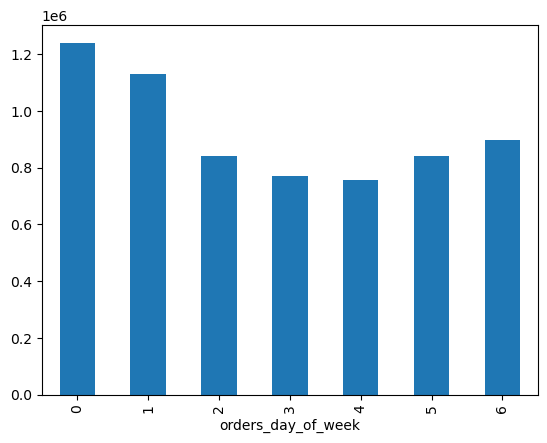

In [37]:
# Show frequency of orders_day_of_week, sorted

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

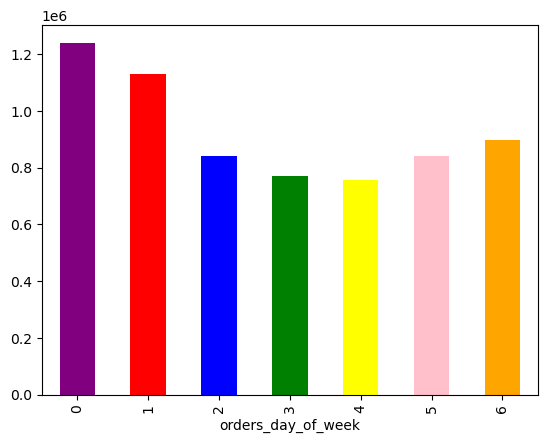

In [39]:
# Plot a bar chart of orders_day_of_week, sorted, colors added

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'blue', 'green', 'yellow', 'pink', 'orange'])

## Export Visual

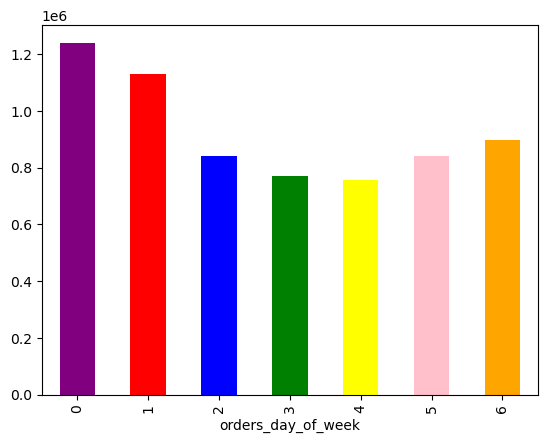

In [41]:
# Define bar chart to prep for export

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'blue', 'green', 'yellow', 'pink', 'orange'])

In [43]:
# Export outside Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Create a Histogram

<Axes: ylabel='Frequency'>

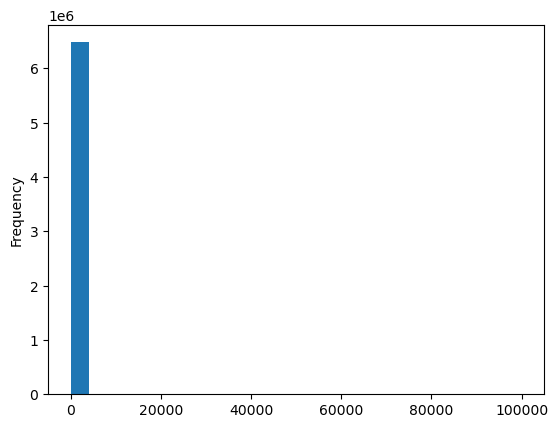

In [45]:
# Create histogram of prices column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [47]:
# Check descriptive statistics of prices column

ords_prods_merge['prices'].describe()

count    6.480944e+06
mean     1.196111e+01
std      4.958698e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [49]:
# Check mean of prices

ords_prods_merge['prices'].mean()

11.961112

In [51]:
# Check median of prices

ords_prods_merge['prices'].median()

7.400000095367432

In [53]:
# Check max of prices

ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

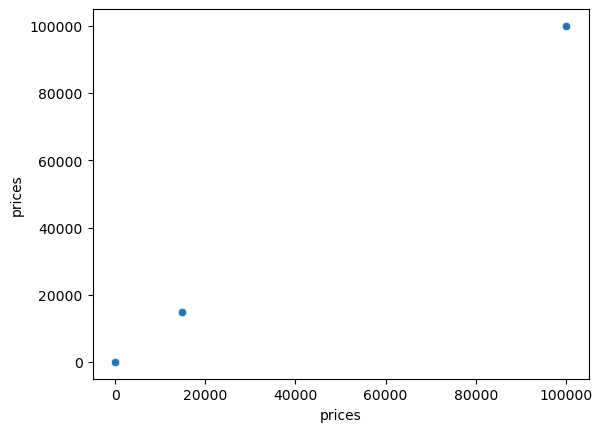

In [55]:
# Create a scatterplot of the prices column

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [57]:
# Looking for the outlier prices (over $100 chosen as this seems quite high for a grocery item)

ords_prods_merge[['order_number', 'product_id','prices']].loc[ords_prods_merge['prices'] > 100]

,order_number,product_id,prices
6244,11,21553,14900.0
6245,61,21553,14900.0
34350,99,21553,14900.0
56945,3,21553,14900.0
58292,5,21553,14900.0
...,...,...,...
6469002,1,21553,14900.0
6469008,2,21553,14900.0
6473236,10,33664,99999.0
6473237,8,33664,99999.0


In [59]:
# Turn items above $100 into NaN for now until you know how to properly deal with them

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan#

In [61]:
# Check max value of price column after converting unusually high priced items to NaN

ords_prods_merge['prices'].max()

25.0

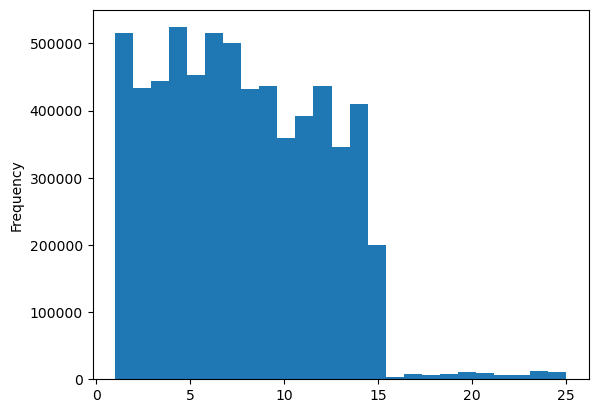

In [63]:
# Redo prices histogram after removing values above $100

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

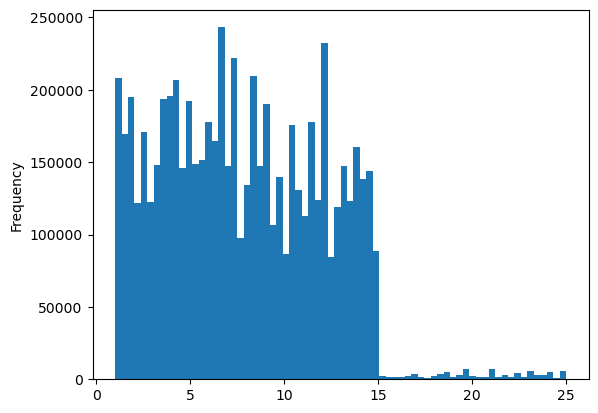

In [65]:
# Increase number of bins to 70

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [67]:
# Export outside Jupyter in the form of an image file

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## Create Line Charts

In [69]:
# Create a list holding True / False value to test the np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [71]:
# Store 70% of the sample in the big dataframe

big = ords_prods_merge[dev]

In [73]:
# Store 30% of the sample in the small dataframe

small = ords_prods_merge[~dev]

In [75]:
# Reduce samples to only those necessary in the line chart

df_2 = small[['orders_day_of_week','prices']]

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

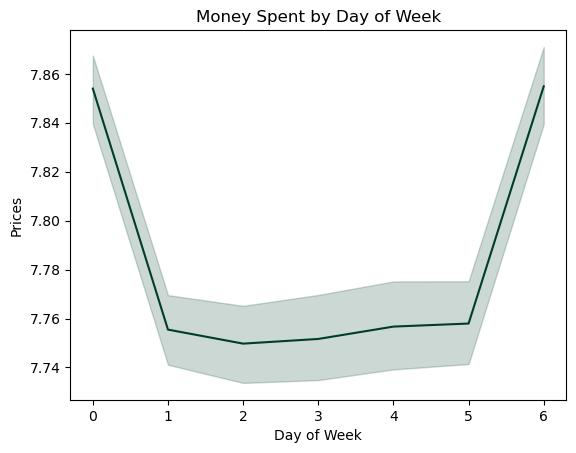

In [77]:
# Plot out the line chart

day_of_week_line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices', color='#003D29')
plt.title('Money Spent by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')

In [79]:
# Export outside Jupyter in the form of an image file

day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_of_week_line.png'))

# 04. Part 2 Exercise

## Orders by Hour of Day Bar Chart

In [81]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

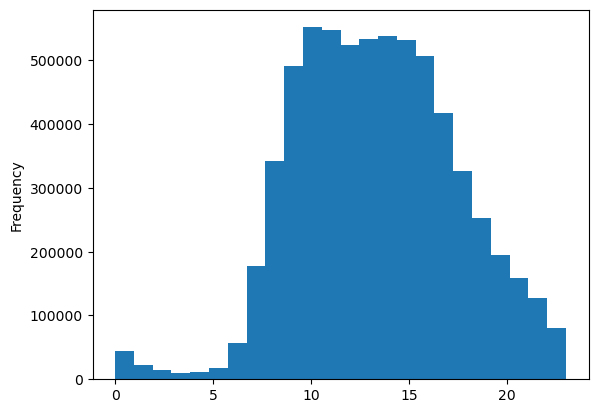

In [83]:
# Create histogram of 'order_hour_of_day' column

bar_orders_hr_day = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

#### Notes:

This histogram shows frequency of orders by hour of day. 24 bins were selected to reflect each hour of the day. You can see a drop in orders in the early hours of the morning (though there are some night owls still looking to shop). Otherwise, the highest number of orders hits around 10am and starts to taper off after 3pm.

In [85]:
# Export outside Jupyter in the form of an image file

bar_orders_hr_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_hr_day.png'))

## Loyalty Flag Bar Chart

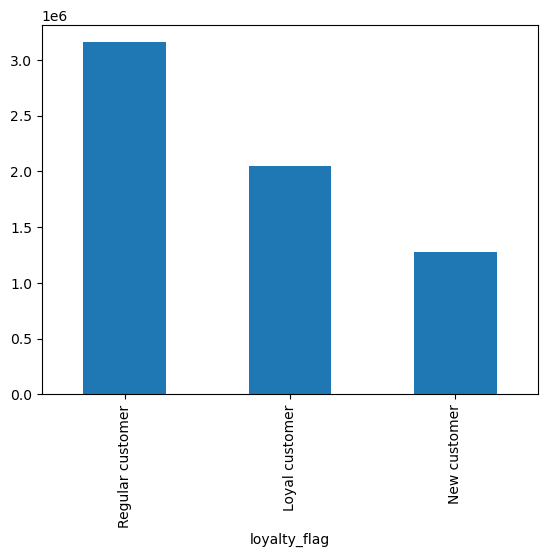

In [87]:
# Create bar chart of 'loyalty_flag' column

bar_loyalty_flag = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

#### Notes:

The above bar chart shows that there are more regular customers than even that of loyal customers.

In [89]:
# Export outside Jupyter in the form of an image file

bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## Prices by Hour of Day Line Chart

In [91]:
# Create a new reduced sample subset for orders by hour of day

df_3 = small[['order_hour_of_day','prices']]

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

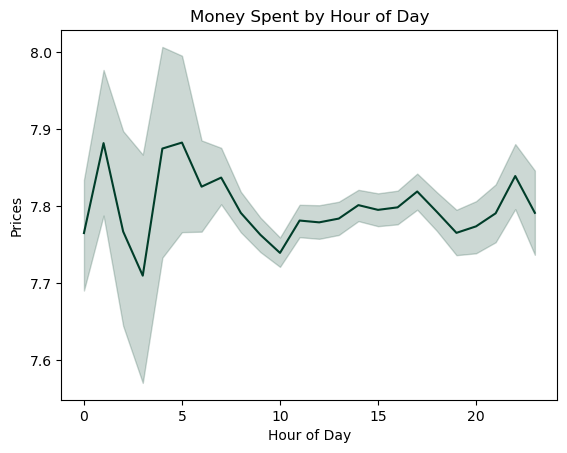

In [93]:
# Plot out the line chart

prices_hr_day_line = sns.lineplot(data=df_3, x='order_hour_of_day', y='prices', color='#003D29')
plt.title('Money Spent by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')


#### Notes:

Prices of items purchased in the day tend to rise up compared to prices of items purchased late at night or early in the morning.

In [95]:
# Export outside Jupyter in the form of an image file

prices_hr_day_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hr_day_line.png'))

## Age & Dependants Line Chart

In [97]:
# Create a new reduced sample subset for age_customers and number_dependants

df_4 = small[['age_customer','number_dependants']]

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Average Number of Dependants')

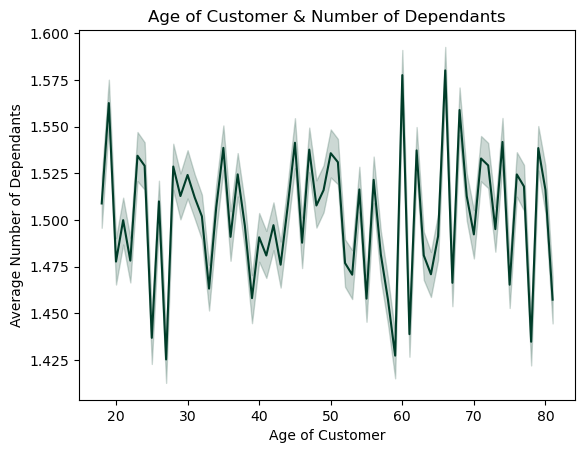

In [149]:
# Plot out the line chart

line_age_dependants = sns.lineplot(data = df_4, x = 'age_customer',y = 'number_dependants', color='#003D29')
plt.title('Age of Customer & Number of Dependants')
plt.xlabel('Age of Customer')
plt.ylabel('Average Number of Dependants')


In [152]:
# Export outside Jupyter in the form of an image file

line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants_line.png'))

#### Notes:

What's happening above is the scatterplot appears to be averaging out the number of dependants customers have depending on customer age group. So for example, the average number of dependants that 20 year old customers have is somewhere between 1.55 and 1.575. The average number of dependants is slightly higher for customers in their 60s - 70s. Customers in their late 20s have a lower amount of children on average.

In [101]:
# Export outside Jupyter in the form of an image file

line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

## Age & Income Scatterplot

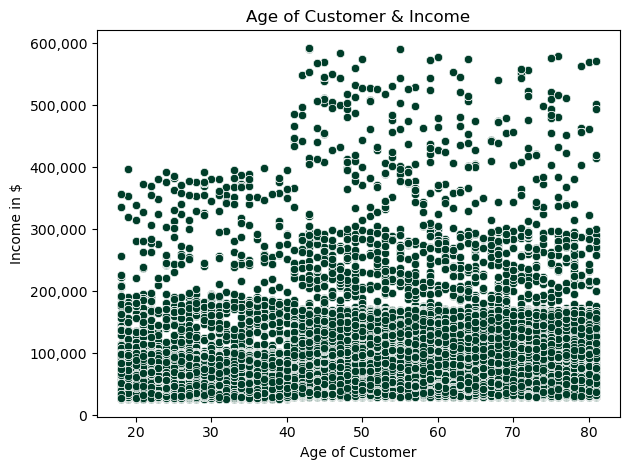

In [177]:
# Create a scatterplot of the age and income columns

scatter_age_income = sns.scatterplot(x='age_customer', y='income', data=ic_final, color='#003D29')
plt.title('Age of Customer & Income')
plt.xlabel('Age of Customer')
plt.ylabel('Income in $')

# Define a custom formatter function
def format_with_commas(x, p):
    return f"{x:,.0f}"

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

# Adjust layout and display the chart
plt.tight_layout()

plt.show()


#### Notes:

This scatterplot shows that the purchasing power of customers in their 20s - 30s is not has high as those in their 40s to 80s and above. Interestingly, there is a sudden increase after age 40.

In [180]:
# Export outside Jupyter in the form of an image file

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatter.png'))